# **Práctica 5: Algoritmos de búsqueda. Parte 2**

**Objetivo:** Conocer e identificar algunas de las características necesarias para realizar búsquedas por transformación de llaves.

**Actividades:**
- Implementar la búsqueda por transformación de llaves utilizado alguna técnica de resolución de colisiones en lenguaje Python.

**Instrucciones:**
- Implementar un programa que permita almacenar y recuperar elementos de un nodo mediante una función hash. Se deben tratar las colisiones con dos métodos diferentes de los vistos en clase.
- Obtener el polinomio y la complejidad de los algoritmos implementados, para el mejor, el peor y el caso promedio (complejidad temporal y espacial). 
- Crear las gráficas de complejidad de las implementaciones realizadas para el mejor, el peor y el caso promedio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

 C R E A C I Ó N _ D E _ N O D O

In [2]:
class Node:
    def __init__(self, string, num):
        self.string = string
        self.num = num

    def __str__(self):
        return self.string + "-" + str(self.num)

In [3]:
TAM = 10
l = []
i = 0

while i < TAM:
    l.append(Node("Node " + str(i), i))
    i += 1

i = 0
while i < len(l):
    print(l[i])
    i += 1

Node 0-0
Node 1-1
Node 2-2
Node 3-3
Node 4-4
Node 5-5
Node 6-6
Node 7-7
Node 8-8
Node 9-9


F U N C I Ó N _ H A S H

- **Polinomio:**  13 * log10(d) + 51
- **Mejor caso:** O(log10(d))
- **Mejor caso:** O(log10(d))
- **Mejor caso:** O(log10(d))

In [4]:
def sumarDigitos(numero):
    suma = 0                        # 3
    while numero > 0:               # log10(d)
        suma += numero % 10         # log10(d)
        numero //= 10               # log10(d)
    return suma                     # 2
                                    # 3 * log10(d) + 5

In [5]:
def funcionHash(key):
    keyHash = key * 9                       # 5
    print(keyHash)
    suma = sumarDigitos(keyHash)            # 4 * (3 * log10(d) + 5)
    while suma >= 10:                       # log10(d)
        suma = sumarDigitos(suma)           # 4 * (3 * log10(d) + 5)
        
    if suma == 9:                           # 4
        print("Colisión")
    return suma                             # 2
                                            # 13 * log10(d) + 51

print(funcionHash(5))  
print("=============")  
print(funcionHash(9))  
print("=============")  
print(funcionHash(34545))  
print("=============")  
print(funcionHash(34654545))  



45
Colisión
9
81
Colisión
9
310905
Colisión
9
311890905
Colisión
9


G U A R D A R _ E N _ A R R A Y

In [6]:
arr = [None] * 10

def guardar (arr, key):
    i = funcionHash(key)
    if arr[i] != None:
        print (f"Colisión en {i}")
        print (f"Ya está almacenado {arr[i]}")
    arr[i] = key

guardar(arr, 5)
guardar(arr, 9)

45
Colisión
81
Colisión
Colisión en 9
Ya está almacenado 5


R E A S I G N A C I Ó N

In [7]:
arr1 = [None] * 10

def reasignar(arr, key):
    i = funcionHash(key.num)
    indice = i
    
    while arr1[i] != None:
        print(f"Colisión en {i}")
        i = (i + 1) % len(arr)
        
        if indice == i:
            print("Espacio lleno")

    arr1[i] = key

#reasignar(arr1, 5)
#reasignar(arr1, 9)
#print(arr1)


In [8]:
def buscar(arr, key):               # Peor / promedio casos             # Mejor caso, sólo entra una vez al while
    i = funcionHash(key)            # 4 * (13 * log10(d) + 51)          # 4 * (13 * log10(d) + 51)
    tope = i                        # 3                                 # 3
    
    while arr[i] != key:            # 5 (n + 1)                         # 1
        if i == tope - 1:           # 6 * n
            return False            # 2 * n
        i += 1                      # 5 * n
        if i >= len(arr)-1:         # 6 * n
            i = 0                   # 3 * n
    return i                        # 2
                                    # 27n + 52 log10(d) + 214             # 52 log10(d) + 208

print(arr1)
buscar(arr1, 5)
buscar(arr1, 9)

[None, None, None, None, None, None, None, None, None, None]
45
Colisión
81
Colisión


False

L I S T A S _ A N I D A D A S

In [9]:
list = [None] * 10

def encadenamiento(list, key):
    i = funcionHash(key)
    
    while list[i] == None:
        list[i] = []
    
    list[i].append(key)
    
encadenamiento(list, 5)
encadenamiento(list, 9)
encadenamiento(list, 18)
print(list)

45
Colisión
81
Colisión
162
Colisión
[None, None, None, None, None, None, None, None, None, [5, 9, 18]]


In [10]:
def buscarList(list, key):                                                                      # Peor / promedio casos                 # Mejor caso, no entra al if
    i = funcionHash(key)                                                                        # 4 * (13 * log10(d) + 51)              # 4 * (13 * log10(d) + 51)  
    
    if list[i] != None:                                                                         # 5                                     # 5                       
        j = 0                                                                                   # 3
        while j < len(list[i]):                                                                 # 6 * (m + 1) * m = len(list)
            if list[i][j] == key:                                                               # 6 * m
                print(f"Clave {key} encontrada en la posición {i}, en {j+1}")
                return True                                                                     # 2 * m
            j += 1                                                                              # 5 * m
        print(f"Clave {key} no encontrada en la lista anidada de la posición {i}")
        
    else:
        print(f"Clave {key} no encontrada.")
        return False                                                                            # 2                                     # 2
                                                                                                # 19m + 52 log10(d) + 61                # 52 log10(d) + 58
print(list)
buscarList(list, 9)

[None, None, None, None, None, None, None, None, None, [5, 9, 18]]
81
Colisión
Clave 9 encontrada en la posición 9, en 2


True

A R R E G L O S _ A N I D A D O S

In [11]:
arr = np.full((0, 10), None)

def anidados(arr, key):
    i = funcionHash(key)
    j = 0
    
    while j < len(arr):
        if arr[j][i] == None:
            arr[j][i] = key
            return arr
        j += 1
    
    nueva = np.full(10, None)
    nueva[i] = key
    arr = np.vstack([arr, nueva])
    return arr

arr = anidados(arr, 5)
arr = anidados(arr, 3)
arr = anidados(arr, 18)
print(arr)


45
Colisión
27
Colisión
162
Colisión
[[None None None None None None None None None 5]
 [None None None None None None None None None 3]
 [None None None None None None None None None 18]]


In [12]:
def buscarArr(arr, key):                                                                    # Peor/promedio casos               # Mejor caso
    i = funcionHash(key)                                                                    # 4 * (13 * log10(d) + 51)          # 4 * (13 * log10(d) + 51) 
    j = 0                                                                                   # 3                                 # 3
    
    while j < len(arr):                                                                     # 5 * (n + 1)                       # 5 * (n + 1)
        if arr[j][i] == key:                                                                # 6 * n                             # 6 * n
            print(f"Clave {key} encontrada en la fila {j + 1} y columna {i}")
            return True                                                                     # 2 * n                             # 2 * n
        j += 1                                                                              # 5 * n
    
    print(f"Clave {key} no encontrada.")
    return False                                                                            # 2
                                                                                            # 18n + 52 log10(d) + 211           # 13n + 52 log10(d) + 207
buscarArr(arr, 18)

162
Colisión
Clave 18 encontrada en la fila 3 y columna 9


True

## G R A P H S

R E A S I G N A C I Ó N

In [13]:
arr1 = [None] * 10

global timeR, spaceR
timeR = 0
spaceR = 0

def sumarDigitos(numero):
    global timeR, spaceR
    suma = 0                    
    while numero > 0:     
        timeR += 1        
        suma += numero % 10       
        numero //= 10               
    return suma  
   
def funcionHash(key):
    global timeR, spaceR
    
    keyHash = key * 9                       
    suma = sumarDigitos(keyHash)            
    while suma >= 10:     
        timeR += 1                  
        suma = sumarDigitos(suma)
        
    #if suma == 9:
        #print("Colisión")
    return suma
 
    
def buscar(arr, key):
    global timeR, spaceR
    i = funcionHash(key.num)
    tope = i
    print(i)
    
    while arr[i].num != key.num:
        
        timeR += 1
        if i == tope - 1:
            return False
        i += 1
        
        if i >= len(arr)-1:
            i = 0
        while arr[i] == None:
            i += 1
        #print(i)


In [14]:
#Mejor caso 

xMejor = []
yMejor = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeR= 0
    spaceR = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    m = 0
    buscar(arr1, l[m])
    xMejor.append(len(l))
    yMejor.append(timeR)  

#print("Mejor caso")    
#print(xMejor)
#print(yMejor)

#print("========================================================================================================================")
#Peor caso 

xPeor = []
yPeor = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeR= 0
    spaceR = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    m = len(l)-1
    buscar(arr1, l[m])
    xPeor.append(len(l))
    yPeor.append(timeR)    

#print("Peor caso")    
#print(xPeor)
#print(yPeor)

#print("========================================================================================================================")

#Promedio caso

xPromedio = []
yPromedio = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeR= 0
    spaceR = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    m = random.choice(l)
    buscar(arr1, m)
    xPromedio.append(len(l))
    yPromedio.append(timeR)    
    
#print("Promedio caso")    
#print(xPromedio) 
#print(yPromedio) 

9
Colisión en 9
9
Colisión en 9
Colisión en 0
9
Colisión en 9
Colisión en 0
Colisión en 1
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión en 5
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión en 5
Colisión en 6
9
9
Colisión en 9
9
Colisión en 9
Colisión en 0
9
Colisión en 9
Colisión en 0
Colisión en 1
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión en 5
9
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3


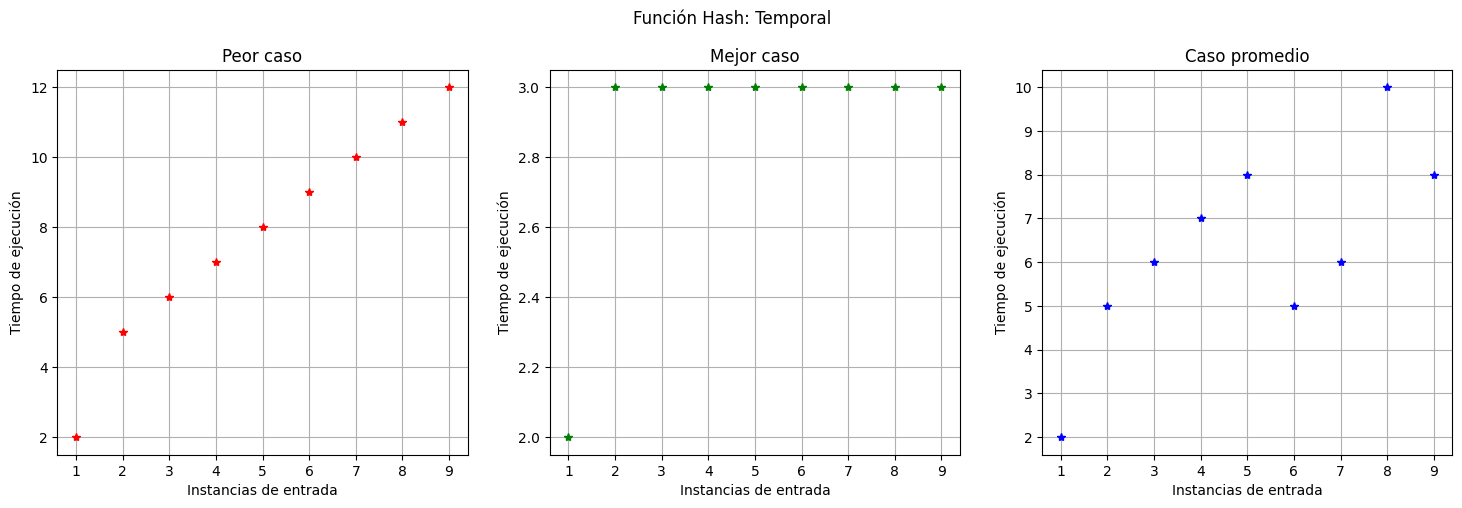

In [15]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.plot(xPeor, yPeor, "r*")
ax2.plot(xMejor, yMejor, "g*")
ax3.plot(xPromedio, yPromedio, "b*")

fig.suptitle("Función Hash: Temporal", y = 1)
ax1.set_title("Peor caso")
ax2.set_title("Mejor caso")
ax3.set_title("Caso promedio")

ax1.set_xlabel("Instancias de entrada")
ax1.set_ylabel("Tiempo de ejecución")

ax2.set_xlabel("Instancias de entrada")
ax2.set_ylabel("Tiempo de ejecución")

ax3.set_xlabel("Instancias de entrada")
ax3.set_ylabel("Tiempo de ejecución")

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

L I S T A S _ A N I D A D A S

In [16]:
arr1 = [None] * 10

global timeL, spaceL
timeL = 0
spaceL = 0

def sumarDigitos(numero):
    global timeL, spaceL
    suma = 0                    
    while numero > 0:     
        timeL += 1        
        suma += numero % 10       
        numero //= 10               
    return suma  
   
def funcionHash(key):
    global timeL, spaceL
    
    keyHash = key * 9                       
    suma = sumarDigitos(keyHash)            
    while suma >= 10:     
        timeR += 1                  
        suma = sumarDigitos(suma)
        
    if suma == 9:
        print("Colisión")
    return suma
 
    
def buscarList(list, key):
    global timeL, spaceL
    i = funcionHash(key)
    
    if list[i] != None:                                                                                 
        j = 0                                                                           
        while j < len(list[i]): 
            timeL += 1                                                              
            if list[i][j] == key:                                                       
                return True                                                                   
            j += 1                                                                            
    else:
        return False       

In [17]:
#Mejor caso 

xMejor = []
yMejor = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeL= 0
    spaceL = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    m = 0
    buscar(arr1, l[m])
    xMejor.append(len(l))
    yMejor.append(timeL)  

print("Mejor caso")    
print(xMejor)
print(yMejor)

print("========================================================================================================================")
#Peor caso 

xPeor = []
yPeor = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeL= 0
    spaceL = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    arr_mayor = []
    #for len(g) in arr1:
        #if len(g) > 0:
            #if len(g) > len(arr_mayor):
                #arr_mayor = g
    #buscar(arr1, arr_mayor[-1])
    xPeor.append(len(l))
    yPeor.append(timeL)    

print("Peor caso")    
print(xPeor)
print(yPeor)

print("========================================================================================================================")

#Promedio caso

xPromedio = []
yPromedio = []
i = 1
TAM = 10
l = []
arr1 = [None]*10

while i < TAM:
    timeL= 0
    spaceL = 0
    l.append(Node("Node " + str(i), i))
    reasignar(arr1, l[-1])
    i += 1
    m = random.choice(l)
    buscar(arr1, m)
    xPromedio.append(len(l))
    yPromedio.append(timeL)    
    
#print("Promedio caso")    
#print(xPromedio) 
#print(yPromedio) 

Colisión
Colisión
9
Colisión
Colisión en 9
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión en 5
Colisión
9
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión en 3
Colisión en 4
Colisión en 5
Colisión en 6
Colisión
9
Mejor caso
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 3, 3, 3, 3, 3, 3, 3]
Colisión
Colisión
Colisión en 9
Colisión
Colisión en 9
Colisión en 0
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2
Colisión
Colisión en 9
Colisión en 0
Colisión en 1
Colisión en 2

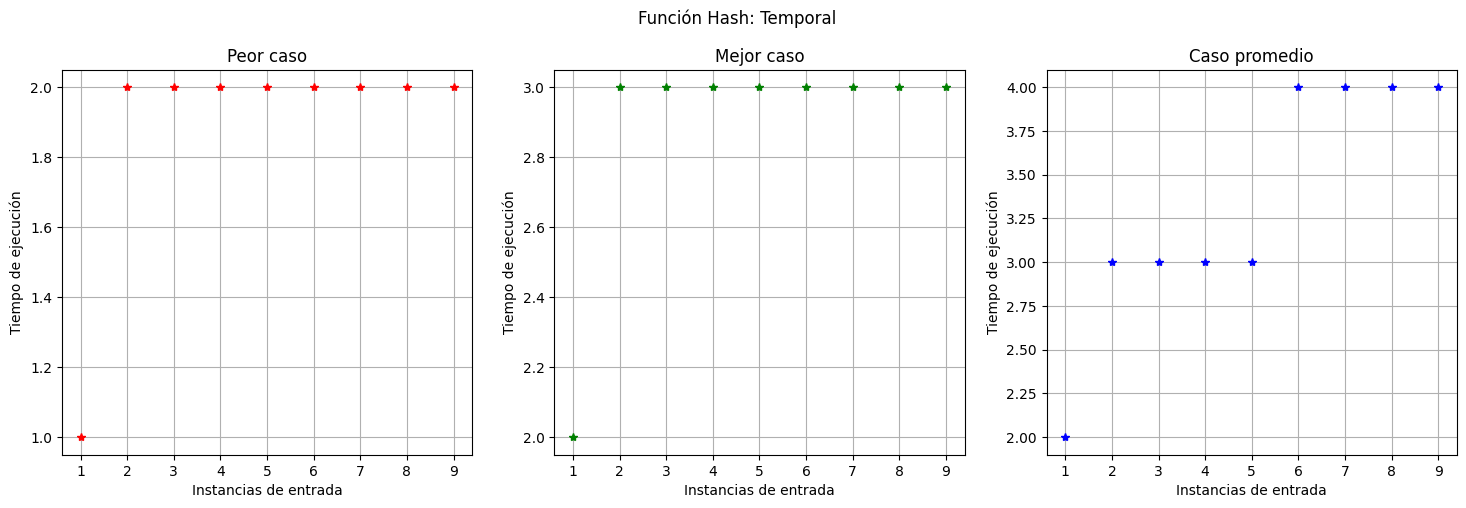

In [18]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

ax1.plot(xPeor, yPeor, "r*")
ax2.plot(xMejor, yMejor, "g*")
ax3.plot(xPromedio, yPromedio, "b*")

fig.suptitle("Función Hash: Temporal", y = 1)
ax1.set_title("Peor caso")
ax2.set_title("Mejor caso")
ax3.set_title("Caso promedio")

ax1.set_xlabel("Instancias de entrada")
ax1.set_ylabel("Tiempo de ejecución")

ax2.set_xlabel("Instancias de entrada")
ax2.set_ylabel("Tiempo de ejecución")

ax3.set_xlabel("Instancias de entrada")
ax3.set_ylabel("Tiempo de ejecución")

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)